In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [22]:
wine_df=pd.read_csv("winequality-red.csv")

In [23]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine_df.shape

(1599, 12)

In [25]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [28]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


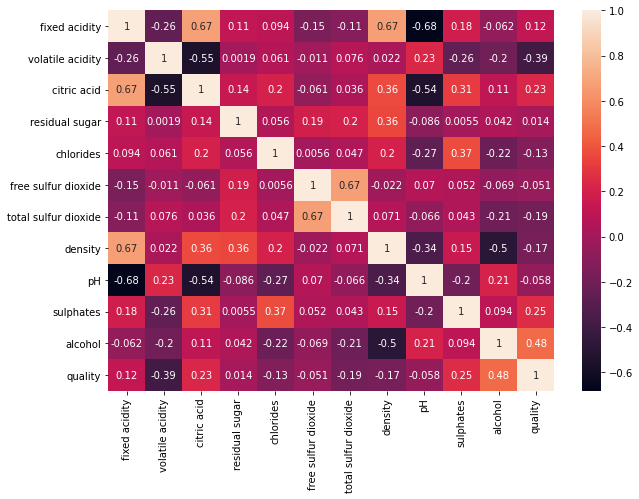

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.show()

In [30]:
wine_df=wine_df.drop("quality", axis=1)

In [31]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


###  to find the optimum no. of cluster we can use elbow method and silhouette method

## elbow method

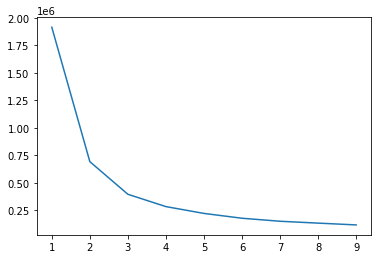

In [35]:
wss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine_df)
    wss.append(kmeans.inertia_)
    
    
plt.plot(range(1,10),wss)
plt.show()
    
    


In [36]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [37]:
from yellowbrick.cluster import KElbowVisualizer
model= KMeans()

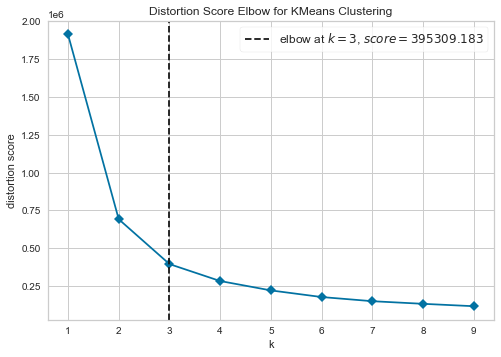

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
visualizer=KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(wine_df)
visualizer.show()

## now we will use silhouette method to know the number of clusters 

In [42]:
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(wine_df)
    score=silhouette_score(wine_df,kmeans.labels_)
    print("For cluster: {}, the silhouette score is :{}".format (i,score))

For cluster: 2, the silhouette score is :0.6034220347331241
For cluster: 3, the silhouette score is :0.5197446557038226
For cluster: 4, the silhouette score is :0.48940007347560743
For cluster: 5, the silhouette score is :0.44642187844374576
For cluster: 6, the silhouette score is :0.44850222651946337
For cluster: 7, the silhouette score is :0.3940373555812897
For cluster: 8, the silhouette score is :0.39901529033397026
For cluster: 9, the silhouette score is :0.38670919608016907


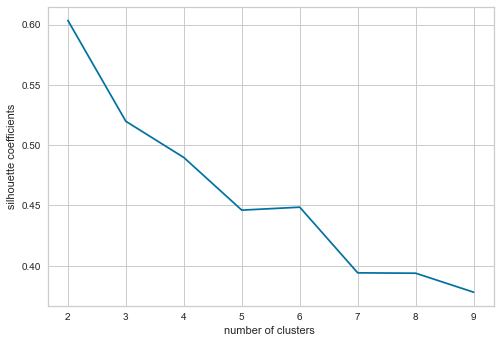

In [43]:
silhouette_coefficients=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(wine_df)
    score=silhouette_score(wine_df,kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters ")
plt.ylabel("silhouette coefficients")
plt.show()

In [44]:
pca = PCA()
X= pca.fit_transform(wine_df)

In [49]:
kmeans=KMeans(n_clusters=4)
label= kmeans.fit_predict(X)
unique_labels=np.unique(label)

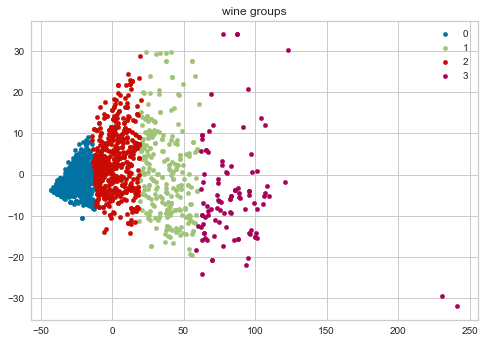

In [50]:
for i in unique_labels:
    plt.scatter(X[label==i,0],X[label==i,1],label=i,s=20)
plt.legend()
plt.title('wine groups')   
plt.show()